In [1]:

using Revise
includet("../general_modules/channels.jl")
include("../general_modules/mesh.jl")
using .channels
using .mesh
using JSON

In [2]:
data = JSON.parsefile("test.json")
Systems_params= data["Systems"]
mesh_params= data["Mesh"]
fermion=true
α= α3b(fermion,0.5,0.5,1,Systems_params["lmax"],Systems_params["lmin"],Systems_params["λmax"],Systems_params["λmin"],Systems_params["s1"],Systems_params["s2"],Systems_params["s3"],Systems_params["t1"],Systems_params["t2"],Systems_params["t3"],Systems_params["MT"])

grid= initialmesh(mesh_params["nθ"],mesh_params["nx"],mesh_params["ny"],Float64(mesh_params["xmax"]),Float64(mesh_params["ymax"]),Float64(mesh_params["alpha"]))

For J=0.5 T=0.5 parity=1 Number of channels: 2
scaling factor for x: 0.18859695545615252


Main.mesh.meshset(12, 30, 30, [-0.9815606342467192, -0.9041172563704748, -0.7699026741943047, -0.5873179542866175, -0.3678314989981802, -0.1252334085114689, 0.1252334085114689, 0.3678314989981802, 0.5873179542866175, 0.7699026741943047, 0.9041172563704748, 0.9815606342467192], [0.04717533638651175, 0.10693932599531826, 0.16007832854334625, 0.20316742672306587, 0.23349253653835492, 0.24914704581340288, 0.24914704581340288, 0.23349253653835492, 0.20316742672306587, 0.16007832854334625, 0.10693932599531826, 0.04717533638651175], [0.02233755499529331, 0.07493852941322005, 0.15777170988775746, 0.2710468592921538, 0.41506220089174284, 0.5902044222346922, 0.7969539970971387, 1.0358926739011418, 1.3077130639006518, 1.6132306695796537  …  7.627531701911872, 8.486257300100586, 9.419116142271335, 10.436398422075927, 11.551987684483082, 12.78547931418975, 14.16630994957712, 15.74295182755926, 17.608089697752572, 20.0], [0.03752824519482659, 0.06768997721952366, 0.09801166074965893, 0.1285883051482

In [ ]:
for i in 1:mesh_params["nx"]
    println(grid.xi[i], "   ", grid.dxi[i])
end

In [ ]:
using Revise
Revise.revise()
includet("Gcoefficient.jl")
using .Gcoefficient

initialY(λmax, lmax, nθ, nx, ny, cosθi, xi, yi, P::Char)
return Yλαout, Ylαin, Yλαin

Yλin[iθ, iy, ix, nch, perm_index]

In [ ]:
Gαα=computeGcoefficient(α, grid)

In [7]:
using Revise
includet("twobody.jl")
using .twobodybound

In [5]:
potname="MT"
e2b, ψ =bound2b(grid, potname)

For J=1.0 parity=+ Number of channels: 2
Bound state 1: Energy = -2.229937369638933 MeV, Norm = 1.0000000000000009
  Normalized eigenvector to unit norm
Number of bound states: 1
Bound state energies: Any[-2.229937369638933]


(Any[-2.229937369638933], Any[[-0.0014326211455279315, -0.0075063378688955875, -0.02486384648938309, -0.0647386922686431, -0.13639004098226024, -0.23732046922937772, -0.34865872321819497, -0.44509212733440856, -0.5086121203937435, -0.53535603330962  …  -0.15413480212124375, -0.12633345799490184, -0.10164590586238913, -0.08029305244729745, -0.061828996300173286, -0.04639965757445958, -0.033414772576104396, -0.022966846378250763, -0.014309104887060668, -0.007193141189600242]])

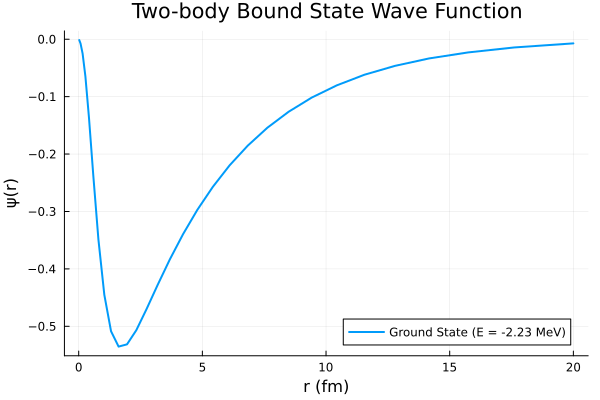

In [6]:
using Plots

# Plot the wave function ψ vs radial coordinate
plot(grid.xi, ψ[1], 
     xlabel="r (fm)", 
     ylabel="ψ(r)", 
     title="Two-body Bound State Wave Function",
     linewidth=2,
     label="Ground State (E = $(round(e2b[1], digits=3)) MeV)")

# Add grid for better visualization
plot!(grid=true)

# Save the plot
savefig("wavefunction_2body.png")
display(current())

In [ ]:
using Revise
includet("spline.jl")
using .spline

In [ ]:
"""
Test the cubic Hermitian spline interpolation with a polynomial function.
"""
# Import Printf for formatting
using Printf
using Plots
function test_cubherm_interpolation()
    # Define the polynomial function f(x) = 5x^5 + 4x^4 + 3x^3 + 2x^2 + x
    f(x) = 5*x^5 + 4*x^4 + 3*x^3 + 2*x^2 + x
    
    # Create a set of old grid points (coarse grid)
    xold = collect(range(-1.0, 1.0, length=15))
    
    # Evaluate the function at the old grid points
    yold = f.(xold)
    
    # println("Original grid points:")
    # for i in 1:length(xold)
    #     println("x = $(xold[i]), f(x) = $(yold[i])")
    # end
    # println()
    
    # Create a set of test points (fine grid) where we want to interpolate
    xtest = collect(range(-0.95, 0.95, length=20))
    
    # Compute the exact values
    yexact = f.(xtest)
    
    # Interpolate using our cubic Hermitian spline
    yinterp = Float64[]
    for x in xtest
        push!(yinterp, cubherm_interp_point(xold, yold, x))
    end
    
    # Compute errors
    errors = abs.(yinterp - yexact)
    max_error = maximum(errors)
    avg_error = sum(errors) / length(errors)
    
    println("Interpolation results and errors:")
    println("   x       Exact        Interpolated       Error")
    println("------------------------------------------------------")
    for i in 1:length(xtest)
        # Use simple string formatting instead of @printf/@sprintf
        x_str = @sprintf("%.4f", xtest[i])
        exact_str = @sprintf("%.6f", yexact[i])
        interp_str = @sprintf("%.6f", yinterp[i])
        error_str = @sprintf("%.6e", errors[i])
        
        println("$(lpad(x_str, 7))  $(lpad(exact_str, 12))  $(lpad(interp_str, 12))  $(lpad(error_str, 12))")
    end
    
    println("\nMaximum error: $max_error")
    println("Average error: $avg_error")
    
    # Optional: Plot the results if Plots.jl is available
    try
        
        
        p = plot(xold, yold, seriestype=:scatter, 
             label="Original Points", markersize=6, legend=:topleft)
        
        plot!(p, xtest, yexact, 
              label="Exact Function", linewidth=2)
        
        plot!(p, xtest, yinterp, 
              label="Interpolated", linewidth=2, linestyle=:dash)
        
        # Plot error
        p_error = plot(xtest, errors, 
                   label="Interpolation Error", linewidth=2,
                   xlabel="x", ylabel="Error", title="Interpolation Error")
        
        # Display both plots
        plot(p, p_error, layout=(2,1), size=(800, 600),
             title=["Cubic Hermitian Spline Interpolation" ""])
        
        savefig("interpolation_test.png")
        println("\nPlot saved as 'interpolation_test.png'")
    catch
        println("\nPlotting skipped (Plots.jl not available)")
    end
    
    return max_error, avg_error
end

In [ ]:
using Printf 
test_cubherm_interpolation()

In [ ]:
using Revise
includet("matrices.jl")
using .matrices


In [ ]:
Rxy=Rxy_matrix(α, grid)

In [ ]:
using Revise
includet("threebodybound.jl")
using .threebodybound

In [ ]:
ThreeBody_Bound(α, grid)

In [ ]:
T_matrix(α,grid) 

In [ ]:
V_matrix(α, grid, "MT")